In [1]:
import requests
from pandas_datareader import wb
from bs4 import BeautifulSoup as soup
from urllib import request
from urllib.request import Request, urlopen
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Country mapping file
Country_name = pd.read_csv(r'C:\Users\hech1001\Desktop\Python hands on\NLP\Country_Code.csv') # Reading Universe Information Database
countries=Country_name['Master_DB_Key']

<IPython.core.display.Javascript object>

In [3]:
#Loading data from world bank website
df1 = wb.download(indicator='SP.POP.TOTL', country = countries, start=2000,end=2022).reset_index()
df2 = wb.download(indicator='AG.LND.TOTL.K2', country = countries, start=2000,end=2022).reset_index()
df3 = wb.download(indicator='EN.POP.DNST', country = countries, start=2000,end=2022).reset_index()
df4 = wb.download(indicator='SM.POP.NETM', country = countries, start=2000,end=2022).reset_index()
df5 = wb.download(indicator='SP.DYN.IMRT.IN', country = countries, start=2000,end=2022).reset_index()
df6 = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country = countries, start=2000,end=2022).reset_index()
df7 = wb.download(indicator='SE.ADT.LITR.ZS', country = countries, start=2000,end=2022).reset_index()
df8 = wb.download(indicator='IT.CEL.SETS.P2', country = countries, start=2000,end=2022).reset_index()
df9 = wb.download(indicator='AG.LND.ARBL.HA.PC', country = countries, start=2000,end=2022).reset_index()
df10 = wb.download(indicator='AG.PRD.CROP.XD', country = countries, start=2000,end=2022).reset_index()
df11 = wb.download(indicator='SP.DYN.CBRT.IN', country = countries, start=2000,end=2022).reset_index()
df12 = wb.download(indicator='SP.DYN.CDRT.IN', country = countries, start=2000,end=2022).reset_index()
df13 = wb.download(indicator='AG.LND.AGRI.K2', country = countries, start=2000,end=2022).reset_index()
df14 = wb.download(indicator='NV.IND.TOTL.CD', country = countries, start=2000,end=2022).reset_index()
df15 = wb.download(indicator='NV.SRV.TOTL.CD', country = countries, start=2000,end=2022).reset_index()
df16 = wb.download(indicator='SL.UEM.TOTL.NE.ZS', country = countries, start=2000,end=2022).reset_index()
df17 = wb.download(indicator='NY.GDP.PCAP.CD', country = countries, start=2000,end=2022).reset_index()

In [4]:
#Renaming the columns and combining country and year to make unique key
df1 = df1.rename(columns = {'SP.POP.TOTL':'Population'})
df1['Key'] = df1['country'] + "_" + df1['year']
df2 = df2.rename(columns = {'AG.LND.TOTL.K2':'Land'})
df2['Key'] = df2['country'] + "_" + df2['year']
df3 = df3.rename(columns = {'EN.POP.DNST':'Population_Density'})
df3['Key'] = df3['country'] + "_" + df3['year']
df4 = df4.rename(columns = {'SM.POP.NETM':'Net_Migration'})
df4['Key'] = df4['country'] + "_" + df4['year']
df5 = df5.rename(columns = {'SP.DYN.IMRT.IN':'Infant_Mortality'})
df5['Key'] = df5['country'] + "_" + df5['year']
df6 = df6.rename(columns = {'NY.GDP.MKTP.KD.ZG':'GDP_Growth'})
df6['Key'] = df6['country'] + "_" + df6['year']
df7 = df7.rename(columns = {'SE.ADT.LITR.ZS':'Literacy'})
df7['Key'] = df7['country'] + "_" + df7['year']
df8 = df8.rename(columns = {'IT.CEL.SETS.P2':'Mobile_Phones'})
df8['Key'] = df8['country'] + "_" + df8['year']
df9 = df9.rename(columns = {'AG.LND.ARBL.HA.PC':'Arable'})
df9['Key'] = df9['country'] + "_" + df9['year']
df10 = df10.rename(columns = {'AG.PRD.CROP.XD':'Crops'})
df10['Key'] = df10['country'] + "_" + df10['year']
df11 = df11.rename(columns = {'SP.DYN.CBRT.IN':'BirthRate'})
df11['Key'] = df11['country'] + "_" + df11['year']
df12 = df12.rename(columns = {'SP.DYN.CDRT.IN':'DeathRate'})
df12['Key'] = df12['country'] + "_" + df12['year']
df13 = df13.rename(columns = {'AG.LND.AGRI.K2':'Agricultural_Land'})
df13['Key'] = df13['country'] + "_" + df13['year']
df14 = df14.rename(columns = {'NV.IND.TOTL.CD':'Industry_Coverage'})
df14['Key'] = df14['country'] + "_" + df14['year']
df15 = df15.rename(columns = {'NV.SRV.TOTL.CD':'Service_coverage'})
df15['Key'] = df15['country'] + "_" + df15['year']
df16 = df16.rename(columns = {'SL.UEM.TOTL.NE.ZS':'Unemployment'})
df16['Key'] = df16['country'] + "_" + df16['year']
df17 = df17.rename(columns = {'NY.GDP.PCAP.CD':'GDP_PER_CAPITA'})
df17['Key'] = df17['country'] + "_" + df17['year']


In [5]:
#Merging all data sets to create a data frame
dff = pd.DataFrame(df1[['Key', 'Population']].merge(df2[['Key', 'Land']], on = 'Key').merge(df3[['Key', 'Population_Density']], on = 'Key').merge(df4[['Key', 'Net_Migration']], on = 'Key').merge(df5[['Key', 'Infant_Mortality']], on = 'Key').merge(df6[['Key', 'GDP_Growth']], on = 'Key').merge(df7[['Key', 'Literacy']], on = 'Key').merge(df8[['Key', 'Mobile_Phones']], on = 'Key').merge(df9[['Key', 'Arable']], on = 'Key').merge(df10[['Key', 'Crops']], on = 'Key').merge(df11[['Key', 'BirthRate']], on = 'Key').merge(df12[['Key', 'DeathRate']], on = 'Key').merge(df13[['Key', 'Agricultural_Land']], on = 'Key').merge(df14[['Key', 'Industry_Coverage']], on = 'Key').merge(df15[['Key', 'Service_coverage']], on = 'Key')).merge(df16[['Key', 'Unemployment']], on = 'Key').merge(df17[['Key', 'GDP_PER_CAPITA']], on = 'Key')
#Descriptive statistics
dff.describe()

<IPython.core.display.Javascript object>

Population          Land  Population_Density  Net_Migration  \
count  1.694000e+03  1.617000e+03         1617.000000   1.694000e+03   
mean   6.964943e+07  1.237878e+06          288.030403   3.229533e+04   
std    2.080568e+08  2.758512e+06         1089.347799   1.992078e+05   
min    6.459370e+05  6.700000e+02            2.476967  -1.025295e+06   
25%    5.607326e+06  6.889000e+04           34.806134  -2.868500e+04   
50%    1.130281e+07  2.633100e+05           81.906352   1.608500e+03   
75%    4.779083e+07  7.696300e+05          136.704621   4.212475e+04   
max    1.412360e+09  1.638139e+07         7965.878492   1.479676e+06   

       Infant_Mortality   GDP_Growth    Literacy  Mobile_Phones       Arable  \
count       1650.000000  1693.000000  401.000000    1687.000000  1611.000000   
mean          13.737758     3.301019   91.805928      94.089666     0.273813   
std           14.380458     4.075084    8.425407      45.585836     0.308758   
min            1.600000   -21.399900   51.077660       0.024420     0.000098   
25%            4.225000     1.575662   90.156128      67.851339     0.084047   
50%            8.100000     3.300000   94.020798     102.623036     0.171369   
75%           18.575000     5.414004   97.344856     123.783437     0.355524   
max          109.600000    26.170246  100.000000     319.426257     2.026341   

             Crops    BirthRate    DeathRate  Agricultural_Land  \
count  1611.000000  1617.000000  1617.000000       1.617000e+03   
mean     91.824941    15.766244     8.111624       4.534763e+05   
std      19.677621     6.895776     3.332058       9.621830e+05   
min      30.950000     5.600000     0.795000       6.600000e+00   
25%      81.245000    10.200000     5.636000       2.157000e+04   
50%      93.840000    13.200000     7.600000       8.089000e+04   
75%     101.970000    20.643000    10.000000       3.052581e+05   
max     355.970000    43.563000    18.000000       5.290386e+06   

       Industry_Coverage  Service_coverage  Unemployment  GDP_PER_CAPITA  
count       1.677000e+03      1.663000e+03   1508.000000     1694.000000  
mean        1.897647e+11      4.615978e+11      7.854337    18445.536416  
std         5.558477e+11      1.540413e+12      5.171496    20049.072407  
min         6.350187e+08      2.540175e+09      0.100000      131.467354  
25%         1.306256e+10      2.795708e+10      4.387500     3692.679654  
50%         5.073483e+10      9.435568e+10      6.620000     9709.752236  
75%         1.338902e+11      2.747384e+11      9.845000    27518.434679  
max         6.991851e+12      1.809232e+13     33.290001   102913.450844

In [6]:
#Separating year and country name from the key column
dff['Year'] = dff['Key'].apply(lambda x:x.split("_")[1])
dff['Country'] = dff['Key'].apply(lambda x:x.split("_")[0])
df = dff.drop(['Key'], axis = 1)
df.head()

Population     Land  Population_Density  Net_Migration  Infant_Mortality  \
0     9365145      NaN                 NaN          -2762               5.4   
1     9287289  71020.0          130.770051          -2762               5.6   
2     9211657  71020.0          129.705111          -4466               5.8   
3     9140169  71020.0          128.698522          -8582               6.0   
4     9068296  71020.0          127.686511         -12895               6.2   

   GDP_Growth   Literacy  Mobile_Phones    Arable   Crops  BirthRate  \
0    3.916296  98.126358     194.733621       NaN     NaN        NaN   
1   -4.957052        NaN     197.843870  0.005276   93.21     10.620   
2    1.108348  95.526482     212.804439  0.005417  102.54      9.750   
3    1.313914        NaN     219.700673  0.004628   99.17     10.049   
4    0.735069        NaN     218.632299  0.004907   98.67     10.620   

   DeathRate  Agricultural_Land  Industry_Coverage  Service_coverage  \
0        NaN                NaN       1.970667e+11      2.141615e+11   
1      1.766             3898.0       1.473869e+11      1.987176e+11   
2      1.471             3904.0       1.861079e+11      2.287606e+11   
3      1.324             3817.5       2.003671e+11      2.236440e+11   
4      1.202             3838.0       1.660791e+11      2.214629e+11   

   Unemployment  GDP_PER_CAPITA  Year               Country  
0          3.11    44315.554183  2021  United Arab Emirates  
1          4.29    37629.174169  2020  United Arab Emirates  
2          2.33    45376.170838  2019  United Arab Emirates  
3          2.24    46722.268718  2018  United Arab Emirates  
4          2.46    43063.967477  2017  United Arab Emirates

<AxesSubplot:xlabel='GDP_PER_CAPITA', ylabel='Density'>

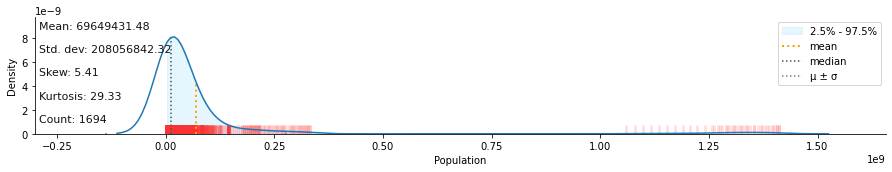

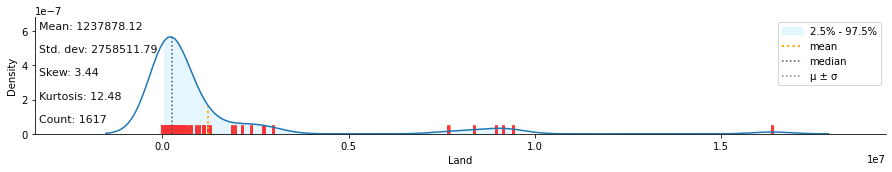

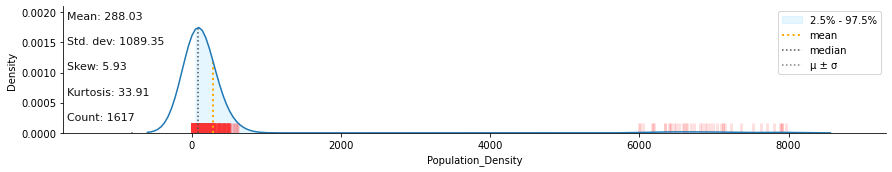

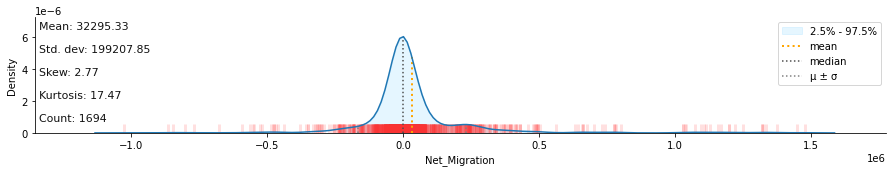

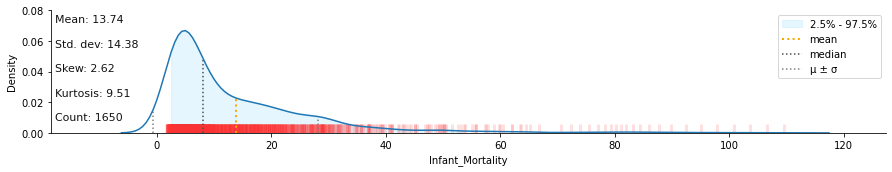

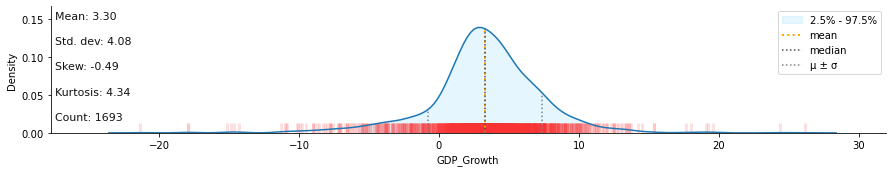

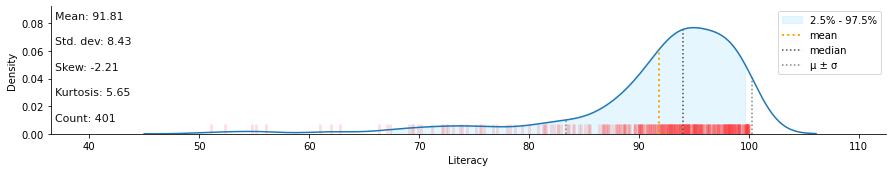

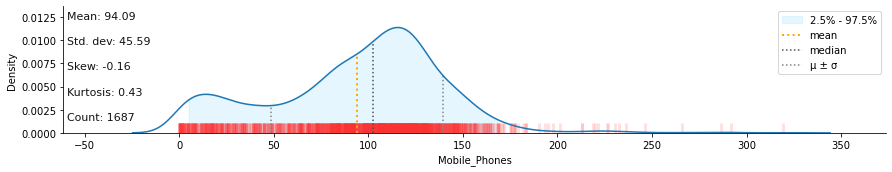

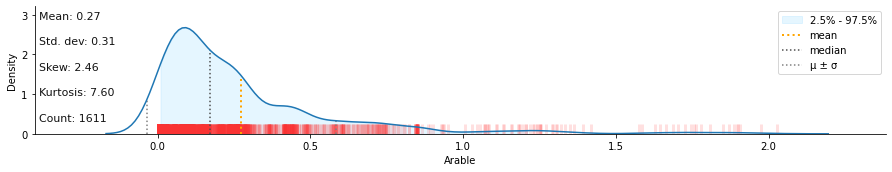

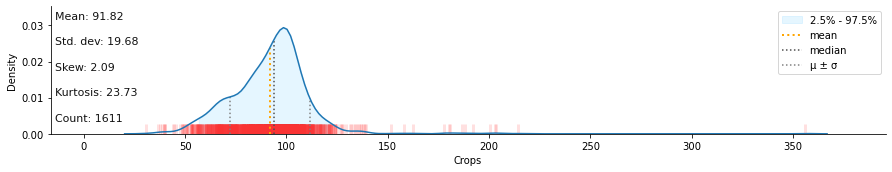

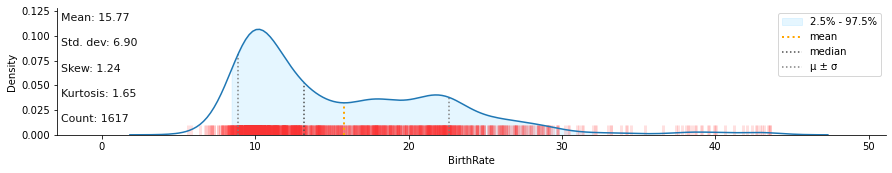

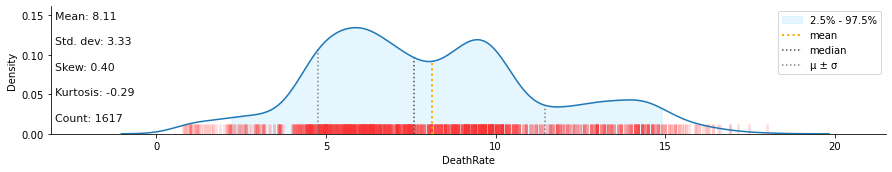

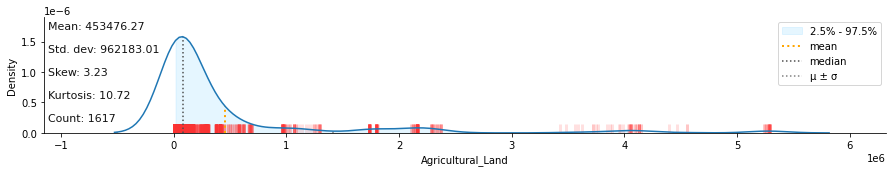

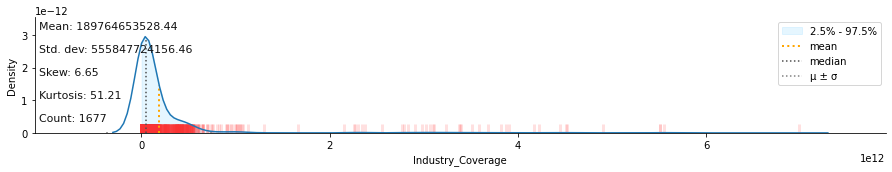

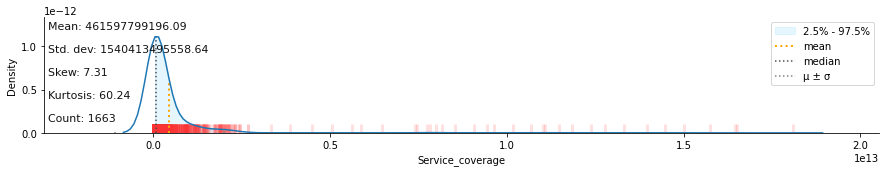

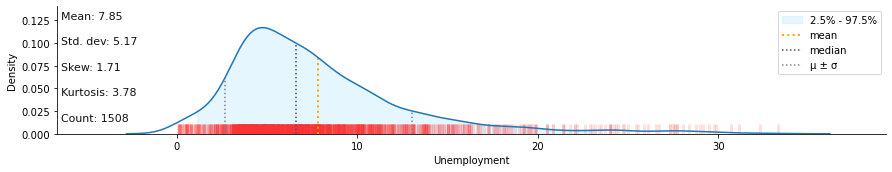

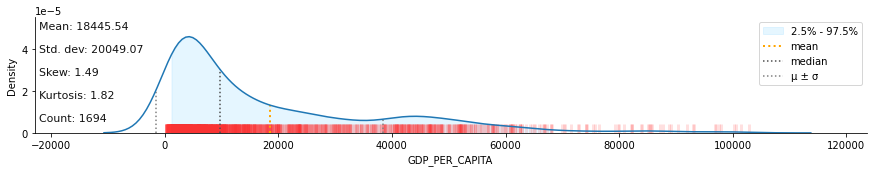

In [7]:
#Distribution plot for every numeric feature
import klib
klib.dist_plot(df, showall=True)

GridSpec(6, 6)

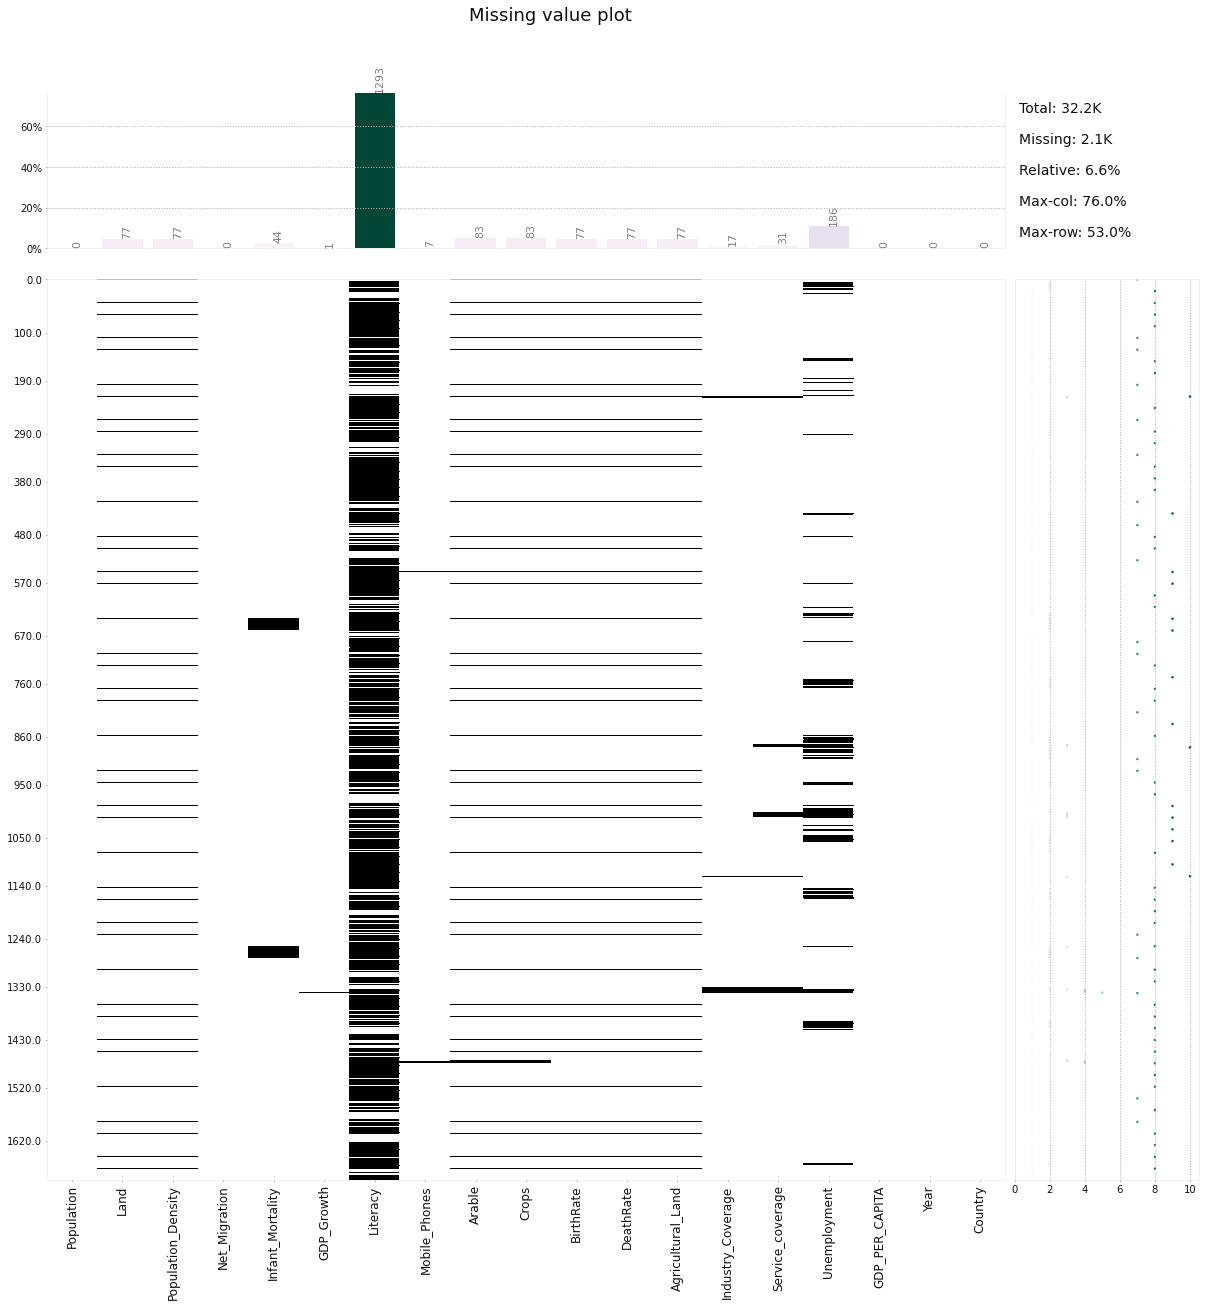

In [8]:
#Visualizing the missing values in the dataset
klib.missingval_plot(df)
#sns.heatmap(df.isnull(), cbar=False)

In [9]:
#Filling the missing values 
df['Land'].fillna(df['Land'].median(),inplace=True)
df['GDP_Growth'].fillna(df['GDP_Growth'].median(),inplace=True)
df['Population_Density'].fillna(df['Population_Density'].median(),inplace=True)
df['Infant_Mortality'].fillna(df['Infant_Mortality'].median(),inplace=True)
df['Literacy'].fillna(df['Literacy'].mean(),inplace=True)
df['Mobile_Phones'].fillna(df['Mobile_Phones'].mean(),inplace=True)
df['Arable'].fillna(df['Arable'].median(),inplace=True)
df['Crops'].fillna(df['Crops'].mean(),inplace=True)
df['BirthRate'].fillna(df['BirthRate'].median(),inplace=True)
df['DeathRate'].fillna(df['DeathRate'].median(),inplace=True)
df['Agricultural_Land'].fillna(df['Agricultural_Land'].median(),inplace=True)
df['Industry_Coverage'].fillna(df['Industry_Coverage'].median(),inplace=True)
df['Service_coverage'].fillna(df['Service_coverage'].median(),inplace=True)
df['Unemployment'].fillna(df['Unemployment'].median(),inplace=True)

In [10]:
#Checking for the missing values in the dataset
df.isna().sum()

Population            0
Land                  0
Population_Density    0
Net_Migration         0
Infant_Mortality      0
GDP_Growth            0
Literacy              0
Mobile_Phones         0
Arable                0
Crops                 0
BirthRate             0
DeathRate             0
Agricultural_Land     0
Industry_Coverage     0
Service_coverage      0
Unemployment          0
GDP_PER_CAPITA        0
Year                  0
Country               0
dtype: int64

Enter country name : Sweden


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Change in GDP over time')

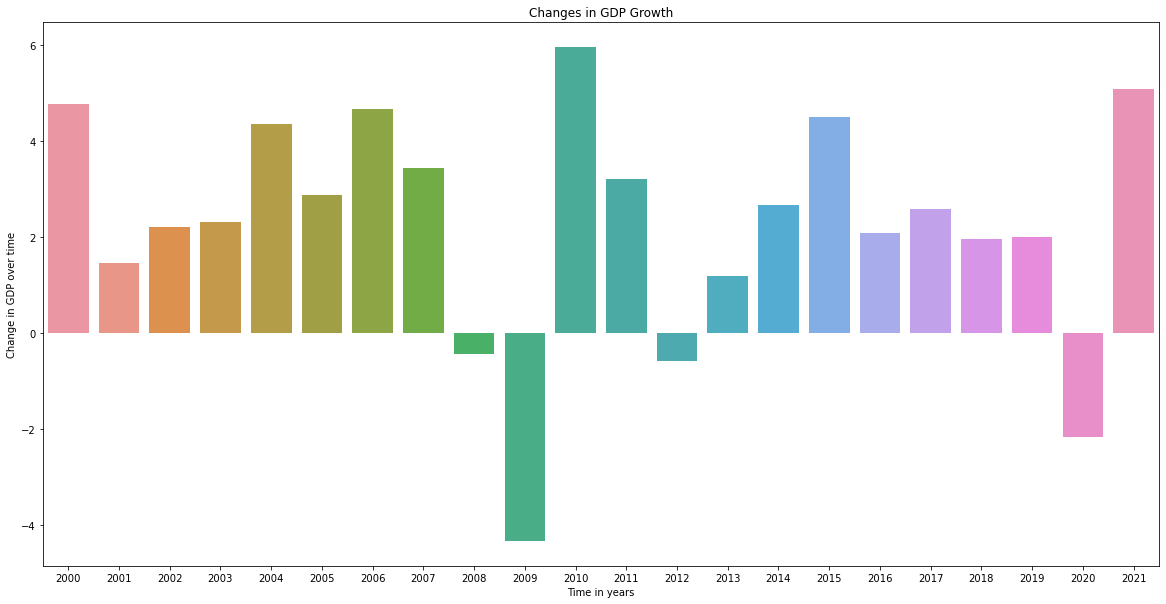

In [11]:
#Enter a country name to check the GDP groth over the years
country = input('Enter country name : ')
df_New = df[(df['Country'] == country)]
plt.figure(figsize=(20,10))
plt.title("Changes in GDP Growth")
sns.barplot(x= df_New['Year'].sort_values(), y = df_New['GDP_Growth'])
plt.xlabel("Time in years")
plt.ylabel("Change in GDP over time")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

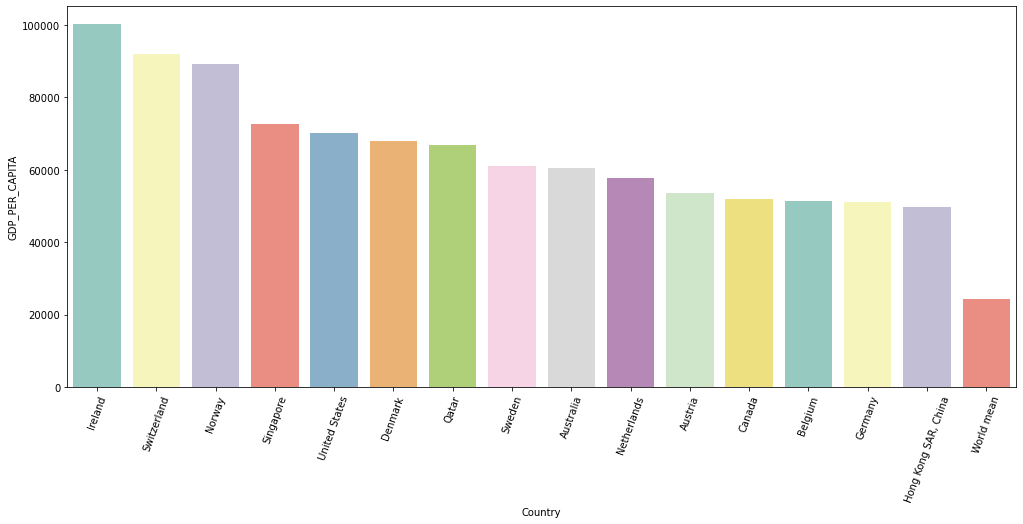

In [12]:
#Top 15 countries having high gdp per capita in 2021
fig, ax = plt.subplots(figsize = (17, 7))
Count21 = df[df['Year'] == '2021']
Top_Countries = Count21.sort_values('GDP_PER_CAPITA', ascending = False).head(15)
Top_Countries
mean = pd.DataFrame({'Country' : ['World mean'], 'GDP_PER_CAPITA' : [Count21['GDP_PER_CAPITA'].mean()]})
gdp = pd.concat([Top_Countries[['Country', 'GDP_PER_CAPITA']], mean], ignore_index = True)

sns.barplot(x = 'Country', y = 'GDP_PER_CAPITA', data = gdp, palette = 'Set3')
plt.xticks(rotation = 70)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

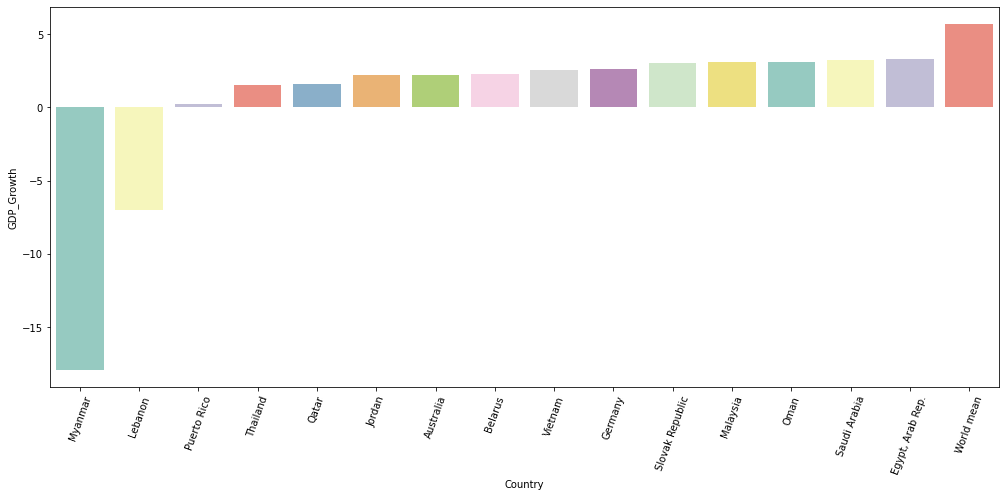

In [13]:
#15 countries having low gdp growth rate in 2021
fig, ax = plt.subplots(figsize = (17, 7))
Count21 = df[df['Year'] == '2021']
Top_Countries = Count21.sort_values('GDP_Growth', ascending = True).head(15)
Top_Countries
mean = pd.DataFrame({'Country' : ['World mean'], 'GDP_Growth' : [Count21['GDP_Growth'].mean()]})
gdp = pd.concat([Top_Countries[['Country', 'GDP_Growth']], mean], ignore_index = True)

sns.barplot(x = 'Country', y = 'GDP_Growth', data = gdp, palette = 'Set3')
plt.xticks(rotation = 70)
plt.show()

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

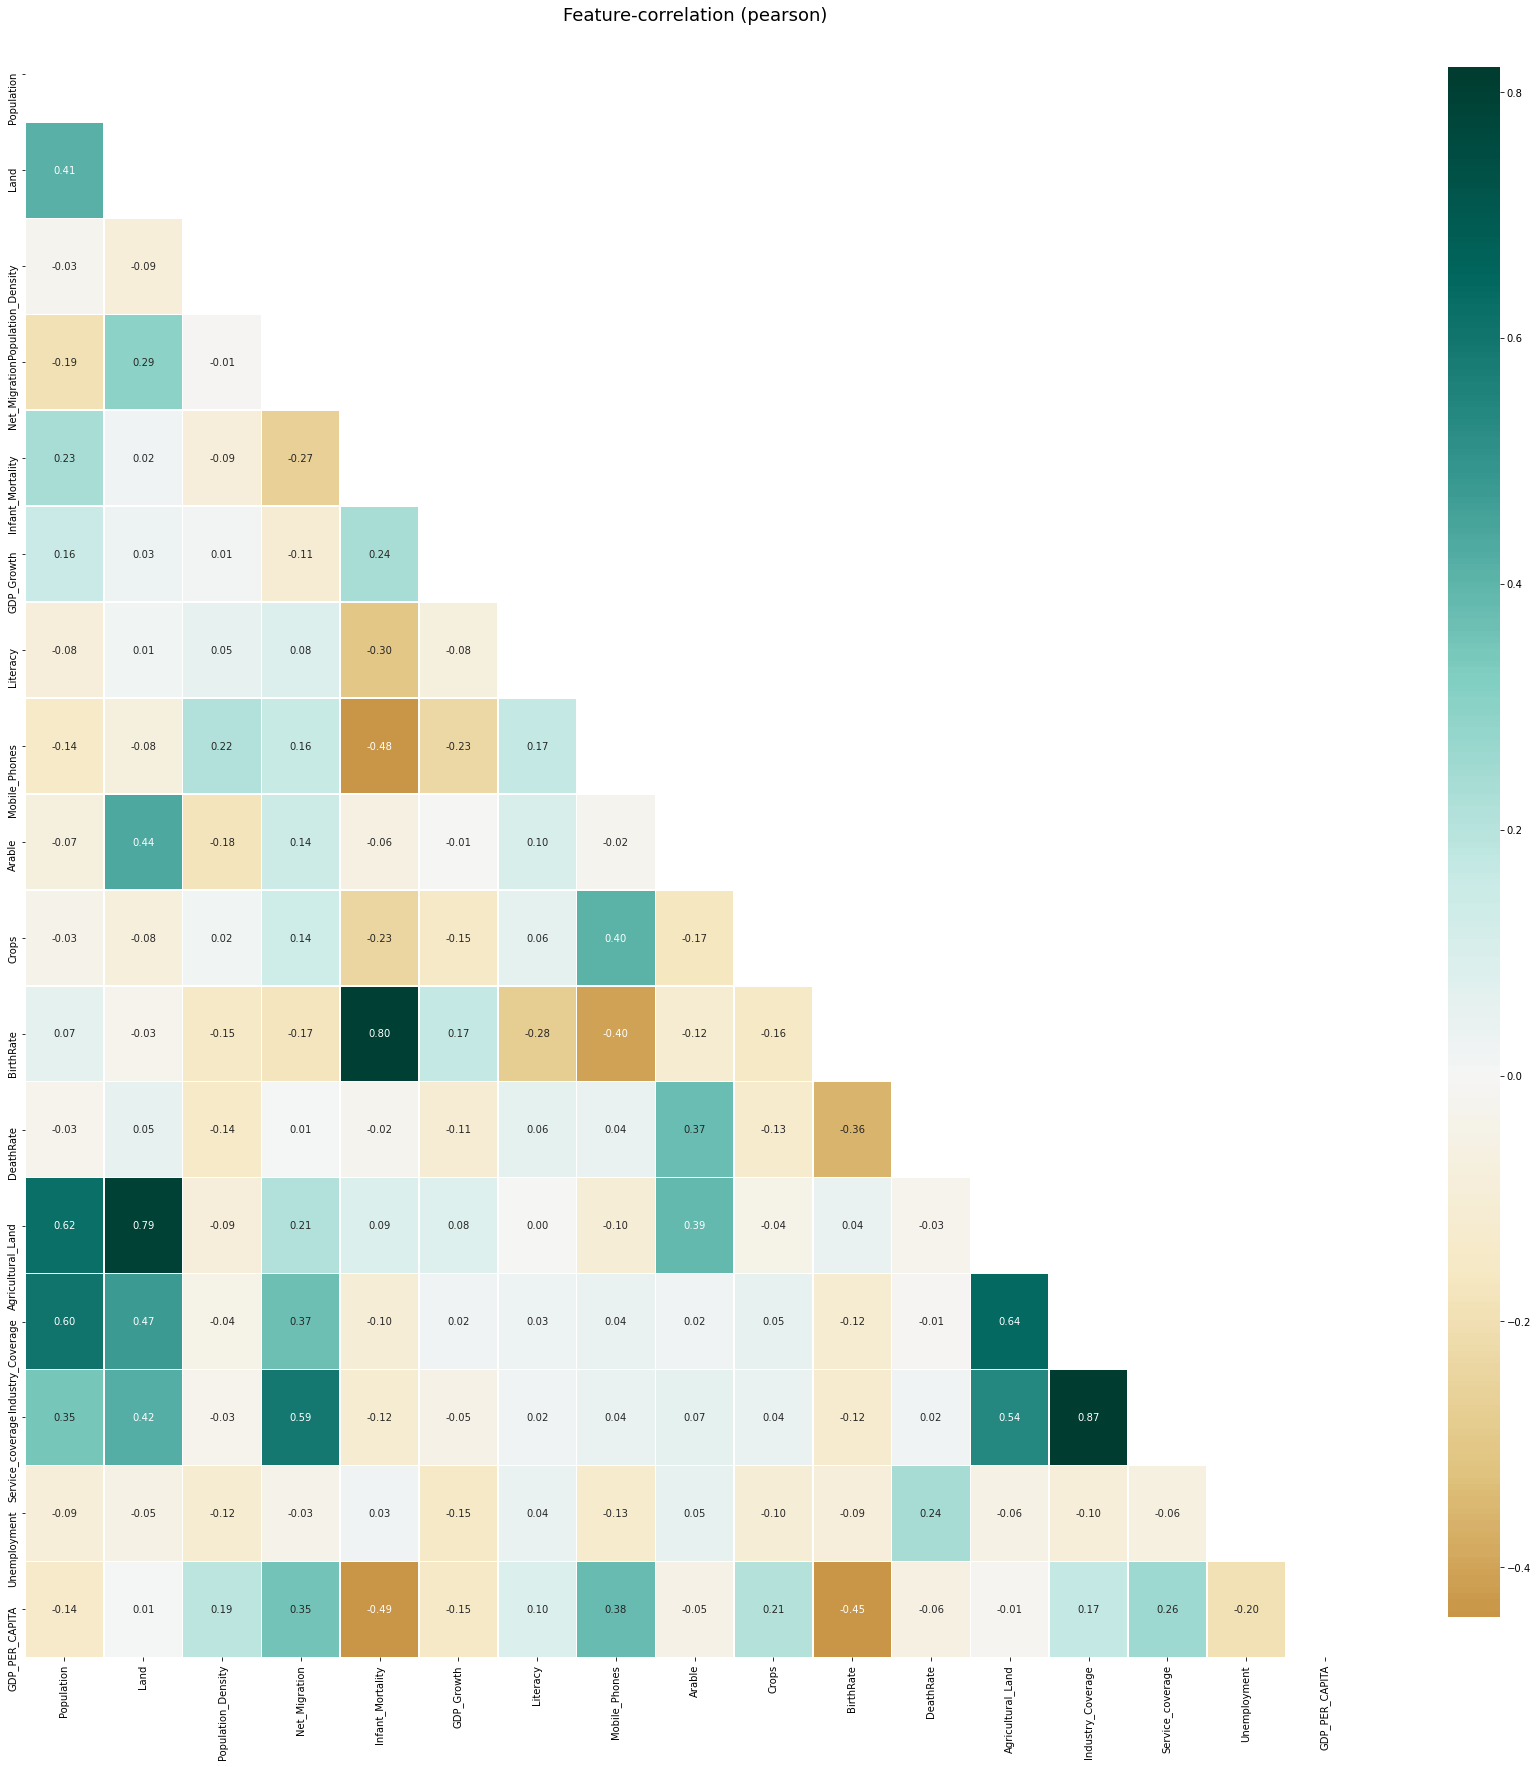

In [14]:
#correlation graph
klib.corr_plot(df, figsize=(30,30))

In [16]:
#Removing the variables having high correlation(>0.7)
df1 = df.drop(['Agricultural_Land', 'Industry_Coverage', 'Infant_Mortality'], axis = 1)
df1.columns

Index(['Population', 'Land', 'Population_Density', 'Net_Migration',
       'GDP_Growth', 'Literacy', 'Mobile_Phones', 'Arable', 'Crops',
       'BirthRate', 'DeathRate', 'Service_coverage', 'Unemployment',
       'GDP_PER_CAPITA', 'Year', 'Country'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

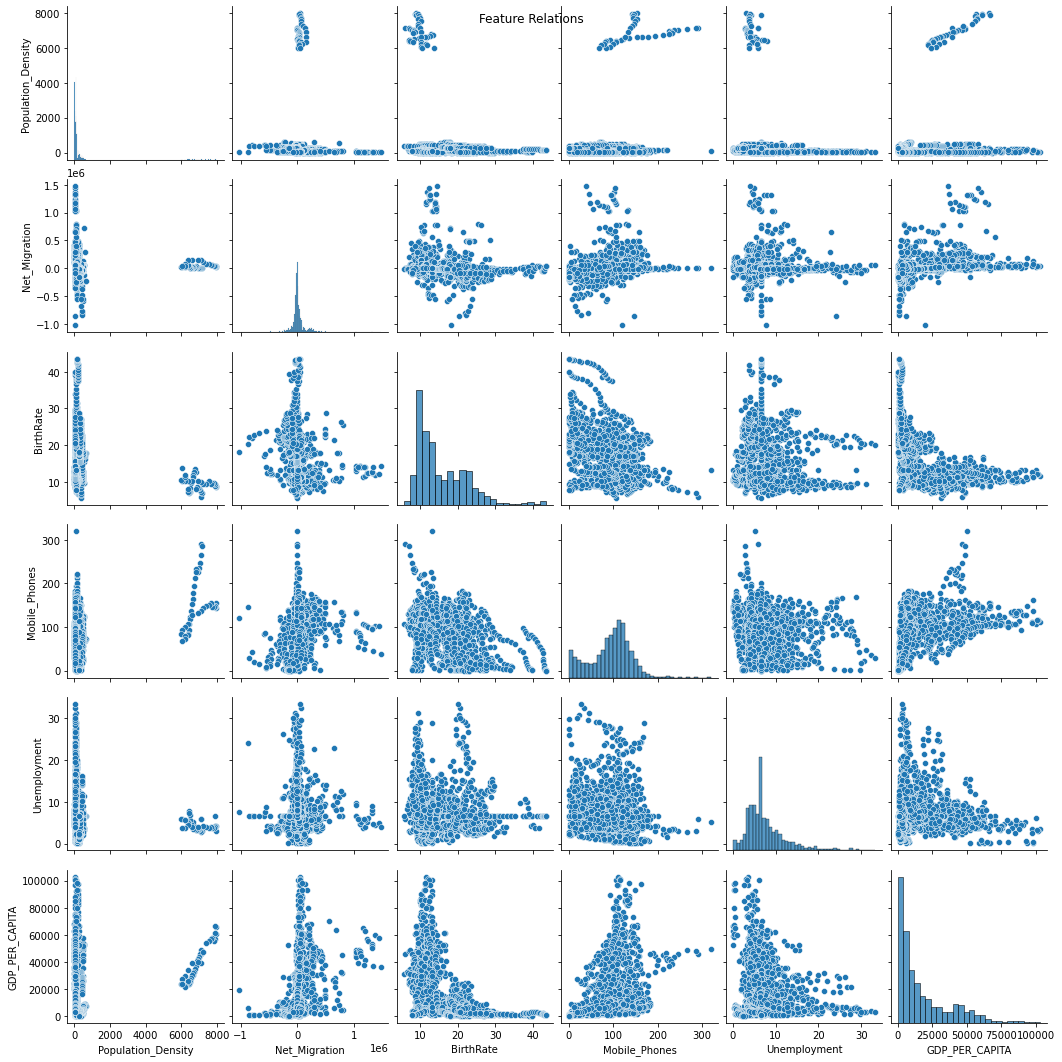

In [17]:
#Pairplot to see the relation b/w the variables
PairP = sns.pairplot(df1[['Population_Density', 'Net_Migration', 'BirthRate', 'Mobile_Phones', 'Unemployment', 'GDP_PER_CAPITA']])
PairP.fig.suptitle('Feature Relations')
plt.show()

In [18]:
#Importing the required models from the library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [19]:
#We will select only a portion of our features, the ones with coreelation score larger than -/+ 0.2 with gdp_per_capita.
#Split the data into train and test set
y = df1['GDP_PER_CAPITA']
X = df1[['Population_Density', 'Net_Migration','Mobile_Phones', 'Crops', 'BirthRate', 'DeathRate', 'Service_coverage', 'Unemployment', 'Year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
#Scaling is used to transforming the values of features or variables in a dataset to a similar scale
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

<IPython.core.display.Javascript object>

Linear Regression Performance:


<IPython.core.display.Javascript object>

MAE: 11183.907872320466


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE: 14870.852082174351


<IPython.core.display.Javascript object>

R2_Score:  0.40389105942096803
We can observe that the variables do not have linear relationship with gdp, so the model performance is very low


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

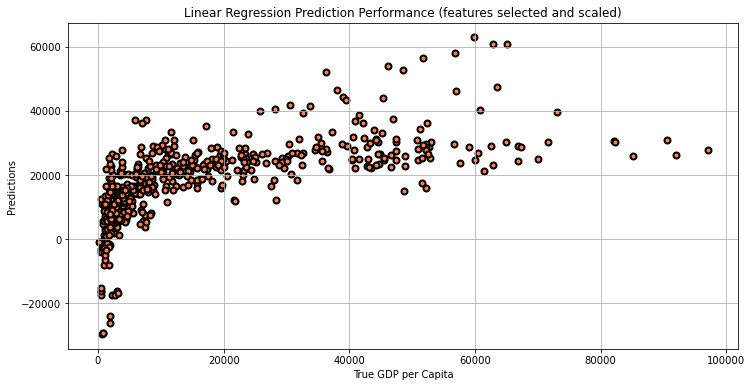

In [21]:
#Fitting linear regression model to the data
lm = LinearRegression()
lm.fit(X2_train,y2_train)
lm_pred = lm.predict(X2_test)
print('Linear Regression Performance:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm_pred))
print('We can observe that the variables do not have linear relationship with gdp, so the model performance is very low')

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,lm_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

SVM Performance:


<IPython.core.display.Javascript object>

MAE: 14002.72257219354


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE: 20911.556457388306


<IPython.core.display.Javascript object>

R2_Score:  -0.17876340737659024


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

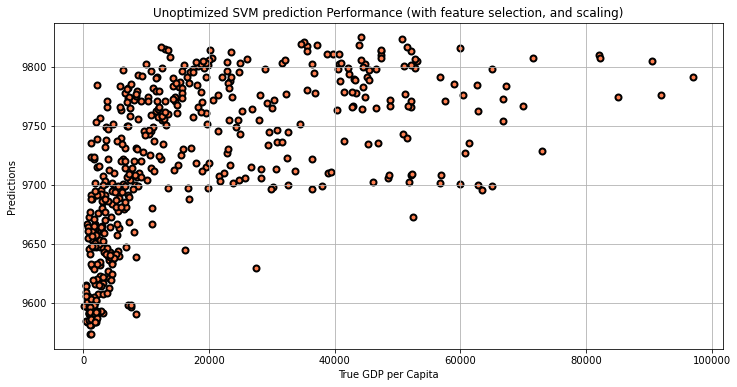

The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.


In [22]:
#Fitting SVM model to the data
svm = SVR(kernel='rbf')
svm.fit(X2_train,y2_train)
svm_pred = svm.predict(X2_test)

print('SVM Performance:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm_pred))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,svm_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

print("The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.")

In [23]:
#Optimizing the SVM model with grid search
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X2_train,y2_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.225 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.150 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.212 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.143 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.254 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.226 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.151 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.213 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.144 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.255 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.227 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

<IPython.core.display.Javascript object>

MAE: 12820.953456135407


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE: 19977.468192414683


<IPython.core.display.Javascript object>

R2_Score:  -0.0758081342246335


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

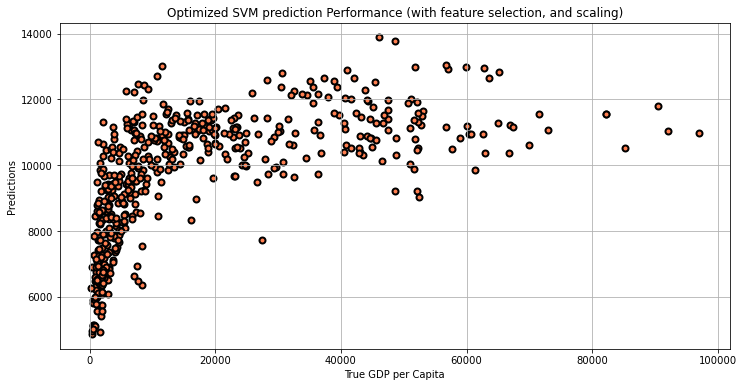

SVM has improved a little with grid search, but it still performs below linear regression.


In [24]:
#SVM model fitting after optimizing the model parameters
grid_predictions = grid.predict(X2_test)
print('MAE:', metrics.mean_absolute_error(y2_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y2_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

print("SVM has improved a little with grid search, but it still performs below linear regression.")

Random Forest Performance:

all features, No scaling:


<IPython.core.display.Javascript object>

MAE: 3194.382990417359


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE: 6989.39035672027


<IPython.core.display.Javascript object>

R2_Score:  0.8683161483450037


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

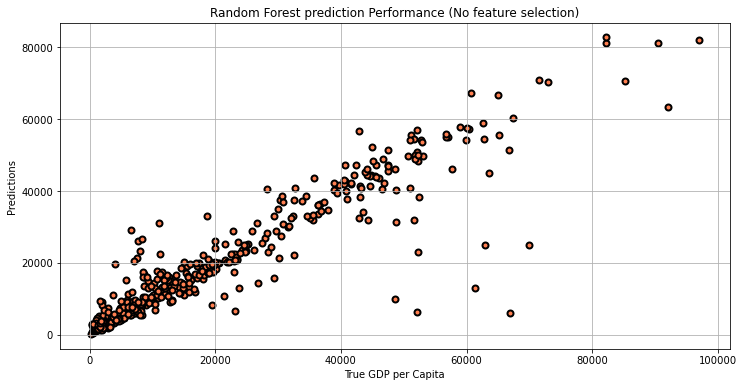

In [25]:
#Randomforest model fitting(For this model there is no need to scale the data, bcz it doesn't effect the model)
rf = RandomForestRegressor(random_state=101, n_estimators=200)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Random Forest Performance:')
print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf_pred))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAE: 2650.289558761539


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE: 6114.061800825138


<IPython.core.display.Javascript object>

R2_Score:  0.8992341027241582


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

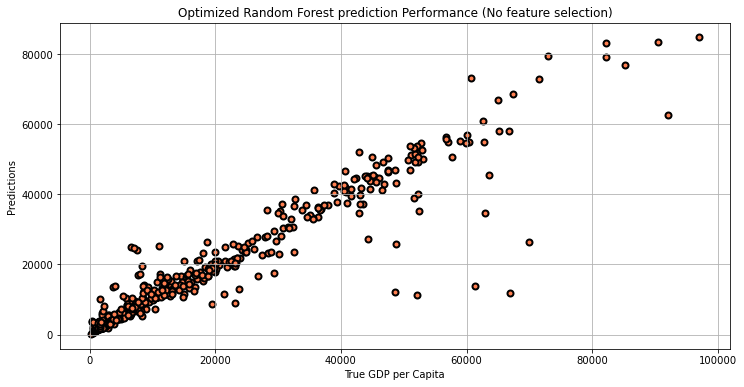

In [26]:
#Model parameters we are trying to optimize
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
             'bootstrap': [False, True]} 

#Optimizing the parameters using gridsearch
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

#Fitting the model with optimized model parameters
rf_grid.fit(X_train,y_train)

#Predicting the gdp
rf_grid_predictions = rf_grid.predict(X_test)

#Plotting the predicted values
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

Gradiant Boosting Performance:


<IPython.core.display.Javascript object>

MAE: 4572.809306555371


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE: 7691.749969812487


<IPython.core.display.Javascript object>

R2_Score:  0.840520727841312


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

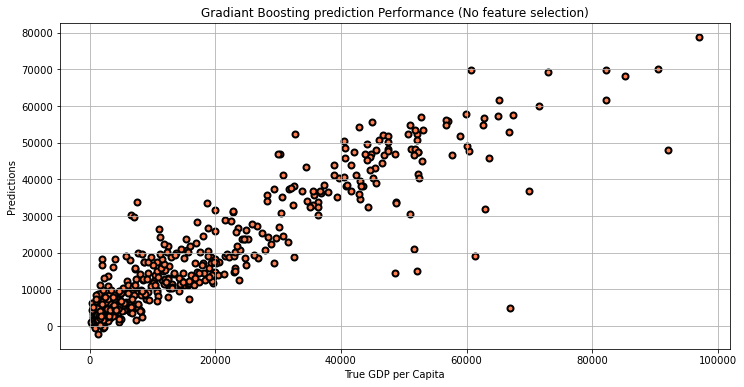

In [27]:
#Traing the GBM regressor with the default parameter value
gbm = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, subsample=1.0, max_features= None, random_state=101)
#Fitting the data into the model
gbm.fit(X_train, y_train)
#Predicting the gdp
gbm_pred = gbm.predict(X_test)

print('Gradiant Boosting Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (No feature selection)') 
plt.grid()
plt.show()

### GBM Optimization
We will use grid search in order to obtain good parameters for our GBM regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:

1. n-estimators: 100, 500, 1000
2. learning_rate: 0.001, 0.01, 0.1, 1
3. max_depth: 3, 5, 8
4. subsample: 0.7, 1 (Values lower than 1 generally lead to a reduction of variance and an increase in bias)
5. min_samples_leaf: 1, 20
6. min_samples_split: 0.5-1% of our data --> we have 227 datapoints --> 10 -20
7. max_features: 4, 7 (sqrt of number of features is a good guess)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

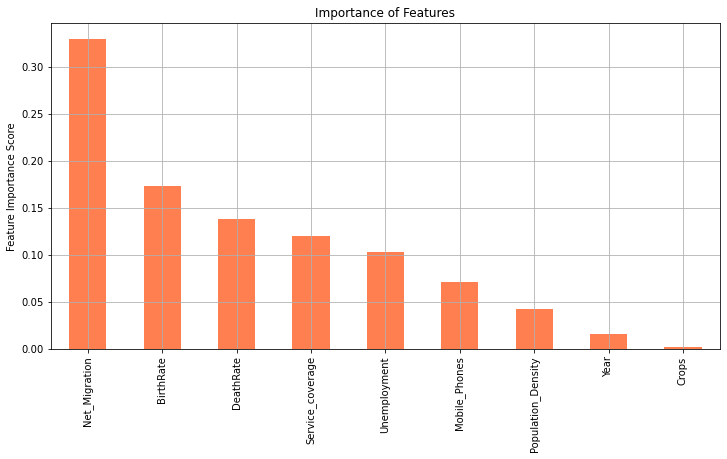

In [28]:
#Visualizing the variables which have the more importance
feat_imp = pd.Series(gbm.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

#Assigning values to the model parameters
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

#Tuning the model parameters using gridsearch
gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)

#Fitting the model with tuned parameters
gbm_tuning.fit(X_train,y_train)

#Predicting the model
gbm_grid_predictions = gbm_tuning.predict(X_test)
print('Gradiant Boosting Performance after tuning the model parameters:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Gradiant Boosting prediction Performance') 
plt.grid()
plt.show()

In [29]:
#Table to compare the model performance
Table = pd.DataFrame(columns=['Algotihme', 'MAE', 'RMSE', 'R2_Score'])
Table['Algotihme'] = ['Logistic regression', 'SVM', 'Tuned SVM', 'Random Forest', 'Tuned RF', 'GBM']
Table['MAE'] = [metrics.mean_absolute_error(y2_test, lm_pred), metrics.mean_absolute_error(y2_test, svm_pred), metrics.mean_absolute_error(y2_test, grid_predictions), metrics.mean_absolute_error(y_test, rf_pred), metrics.mean_absolute_error(y_test, rf_grid_predictions), metrics.mean_absolute_error(y_test, gbm_pred)]
Table['RMSE'] = [np.sqrt(metrics.mean_squared_error(y2_test, lm_pred)), np.sqrt(metrics.mean_squared_error(y2_test, svm_pred)), np.sqrt(metrics.mean_squared_error(y2_test, grid_predictions)), np.sqrt(metrics.mean_squared_error(y_test, rf_pred)), np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)), np.sqrt(metrics.mean_squared_error(y_test, gbm_pred))]
Table['R2_Score'] = [metrics.r2_score(y2_test, lm_pred), metrics.r2_score(y2_test, svm_pred), metrics.r2_score(y2_test, grid_predictions), metrics.r2_score(y_test, rf_pred), metrics.r2_score(y_test, rf_grid_predictions), metrics.r2_score(y_test, gbm_pred)]
Table

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Algotihme           MAE          RMSE  R2_Score
0  Logistic regression  11183.907872  14870.852082  0.403891
1                  SVM  14002.722572  20911.556457 -0.178763
2            Tuned SVM  12820.953456  19977.468192 -0.075808
3        Random Forest   3194.382990   6989.390357  0.868316
4             Tuned RF   2650.289559   6114.061801  0.899234
5                  GBM   4572.809307   7691.749970  0.840521

# Conclusion
In this project, first we scrapped the required data from world bank website and then done EDA to understand the data and handled the missing values and tried to fit some models to predict the GDP of different countries. 4 different learning regression models are (Linear Regression, SVM, Random Forest, and Gradiant Boosting) were tested, and by observing the above model errors, and R2_Score, we can say that the Tuned Random Forest performed well with minimum error and maximum R2_score, followed by Gradiant Boosting, and then Linear Regression, while SVM acheived the worst performance of the 4.

# Recession analysis 
Some countries facing the recession and tried to visualize the GDP growth and Recession over time.

In [30]:
#Enter a country name to get GDP Growth and Recession over Time
country1 = input('Enter country name : ')
data = df[df['Country'] == country1]
data['Recession'] = data['GDP_Growth'] < 0
data['Recession'].fillna(False, inplace=True)
data.set_index('Year', inplace=True)
data.head()
# Plot the GDP growth and recession data
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, 
                         y=data['GDP_Growth'], 
                         name='GDP Growth', 
                         line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=data[data['Recession']].index, 
                         y=data[data['Recession']]['GDP_Growth'], 
                         name='Recession', line=dict(color='red', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time',
                  xaxis_title='Year',
                  yaxis_title='GDP Growth')

fig.show()

Enter country name : Sweden
